In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\user\AppData\Local\Temp\ipykernel_22936\1880915521.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# poi 차원축소

In [2]:
poi = pd.read_csv('POI_500미터.csv')
# poi

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
pca_array = pca.fit_transform(poi)
pca_df = pd.DataFrame(pca_array, index=poi.index, columns=[f'pca{num+1}' for num in range(poi.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21
0,-46.436555,7.925637,6.485296,-4.062677,-5.001956,-0.291331,-1.049031,2.251077,1.366086,-4.077122,...,-0.840659,5.086528,0.617068,-3.352732,-1.115432,0.210562,0.528928,-0.193457,-0.141987,-0.183894
1,-47.104592,9.411792,5.336473,-4.069326,-4.370987,0.016876,-0.854152,2.636940,0.995046,-3.614098,...,-1.515389,5.648361,0.495077,-3.594653,-0.889998,0.158434,0.567680,-0.118996,-0.125501,-0.192255
2,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830
3,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830
4,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830


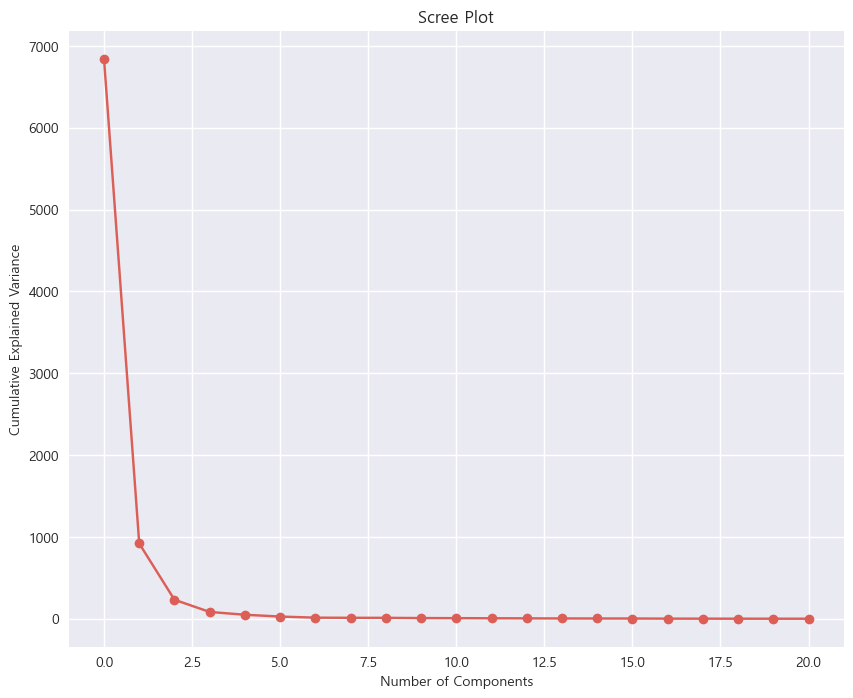

In [4]:
# Scree Plot
plt.figure(figsize=(10,8))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_array = pca.fit_transform(poi)
poi['poi 특성 1'] = pca_array[:, 0]
poi['poi 특성 2'] = pca_array[:, 1]
poi['poi 특성 3'] = pca_array[:, 2]
# poi.head(3)

In [6]:
poi = poi.loc[:,['poi 특성 1', 'poi 특성 2', 'poi 특성 3']]
# poi

In [7]:
sample = pd.read_csv('./데이터/최종 샘플파일_전기추가_검수최종.csv', encoding='cp949')
# sample

In [8]:
df = pd.concat([sample, poi], axis=1)
# df

# 데이터 전처리

In [9]:
# 빈집 추정에 도움되지 않은 열 제거
# 빈집밀집도 제거
df.drop(['주소', '주소1', '주소2', '주소3', '주소4', '주소 최종', '주소 동 최종', '위도', '경도', 
         '건축물대장', '건축승인일자', '건축승인년도', '허가일', '빈집밀집도'], axis=1, inplace=True)
# df

In [10]:
# 현재 연도에서 사용승인 날짜의 연도 빼기
from datetime import datetime

today = 2020

accept = []
for i in range(df.shape[0]):
    try:
        accept.append(today - float(df['사용승인일'][i][:4]))
    except:
        accept.append(df['사용승인일'][i])
df['사용승인일'] = accept
# df

In [11]:
df['사용승인일'].describe()

count    4321.000000
mean       31.468410
std        65.073769
min     -1771.000000
25%        15.000000
50%        32.000000
75%        42.000000
max       119.000000
Name: 사용승인일, dtype: float64

In [12]:
# 사용승인일이 0 이하인 데이터 추출
df[df['사용승인일']<0].index

Int64Index([836, 1978, 2055, 2335, 5228], dtype='int64')

In [13]:
df.loc[df.사용승인일 < 0, '사용승인일'] = np.nan

In [14]:
df['사용승인일'].describe()

count    4316.000000
mean       33.543559
std        22.737001
min         0.000000
25%        15.000000
50%        32.000000
75%        42.000000
max       119.000000
Name: 사용승인일, dtype: float64

# 결측값 처리

In [15]:
df.describe()

,빈집여부,상수도_6개월_위험,상수도_12개월_확정,전기 사용량 최종,대지면적,건축면적,연면적,세대수,가구수,지상층수,...,남자인구,여자인구,외국인남자인구,외국인여자인구,65세이상인구,65세이상인구비율,기초생활수급자비율,poi 특성 1,poi 특성 2,poi 특성 3
count,6249.000000,3946.000000,3946.000000,4901.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,...,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6249.000000,6.249000e+03,6.249000e+03
mean,0.389342,207.460466,433.603142,8393.367476,210.570028,182.411557,396.975331,3.316825,2.688035,2.146957,...,6262.270050,5945.380823,192.908916,107.060989,2075.728350,0.260282,0.071962,0.000000,-4.075188e-15,-3.493019e-15
std,0.487640,2017.499022,4017.249015,24822.037018,305.367972,727.385556,1066.480110,15.702171,4.297757,1.593657,...,6841.783078,6811.295545,327.203187,119.341893,1070.111652,0.104657,0.029899,82.735076,3.032434e+01,1.523280e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1176.000000,1069.000000,5.000000,11.000000,784.000000,0.089055,0.030253,-74.054898,-9.894145e+01,-5.022812e+01
25%,0.000000,20.000000,46.000000,0.000000,0.000000,59.600000,80.850000,0.000000,1.000000,1.000000,...,1670.000000,1557.000000,23.000000,19.000000,1158.000000,0.182538,0.053823,-71.937409,-2.305242e+01,-4.974635e+00
50%,0.000000,65.000000,143.000000,2829.000000,186.200000,92.160000,124.630000,0.000000,1.000000,1.000000,...,2819.000000,2937.000000,64.000000,37.000000,2020.000000,0.271353,0.062816,-26.301513,8.930521e+00,1.486087e+00
75%,1.000000,135.000000,287.000000,9524.000000,314.200000,131.580000,398.280000,0.000000,1.000000,3.000000,...,6751.000000,6453.000000,189.000000,184.000000,2429.000000,0.354775,0.091878,45.067046,1.750432e+01,5.392077e+00
max,1.000000,86736.000000,171147.000000,680493.000000,7140.000000,16114.700000,24320.490000,410.000000,42.000000,15.000000,...,27766.000000,28031.000000,1168.000000,389.000000,4969.000000,0.414254,0.193742,256.557688,1.066438e+02,7.546941e+01


In [16]:
def missing_df(df):
    mc = pd.DataFrame(df.isnull().sum(), columns=["Missing Count"])
    mc = mc[mc['Missing Count']!=0] #불리언 인덱싱
    #새로운 컬럼 추가
    mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
    return mc.sort_values('Missing %',ascending=False)

In [17]:
missing_df(df)

,Missing Count,Missing %
상수도_6개월_위험,2303,36.853897
상수도_12개월_확정,2303,36.853897
주택 가격,2129,34.069451
사용승인일,1933,30.932949
주지붕,1928,30.852936
지하층수,1928,30.852936
가구수,1928,30.852936
세대수,1928,30.852936
기타지붕,1928,30.852936
지상층수,1928,30.852936


In [18]:
df = df[df['상수도_6개월_위험'].notna()]
df = df[df['주택 가격'].notna()]
df = df[df['사용승인일'].notna()]
df = df[df['주지붕'].notna()]
df = df[df['전기 사용량 최종'].notna()]
# df

In [19]:
df.isna().sum().sum()

0

# 왜도값 확인

In [20]:
def skw_df(df):
    # 수치형 변수 skew 값 확인
    numeric = df.dtypes[df.dtypes != "object"].index

    skewness = df[numeric].apply(lambda x : x.skew()).sort_values(ascending=False)

    sk_df = pd.DataFrame(skewness, columns=['skewness'])
    sk_df['skw'] = abs(sk_df)
    return sk_df.sort_values('skw', ascending=False).drop('skw', axis=1)

In [21]:
skw_df(df)

,skewness
상수도_6개월_위험,32.512462
상수도_12개월_확정,32.054748
전기 사용량 최종,17.549491
세대수,14.536876
연면적,11.354256
건축면적,9.521388
대지면적,7.998634
지하층수,3.230702
지상층수,1.966464
외국인남자인구,1.656410


In [22]:
# skew 값이 크면 log(x+1)로 변환
# -2~+2는 치우침이 없는 데이터
# 지하층수, 지상층수는 스케일이 크지 않으므로 변환 안함
df['상수도_6개월_위험'] = np.log1p(df['상수도_6개월_위험'])
df['상수도_12개월_확정'] = np.log1p(df['상수도_12개월_확정'])
df['전기 사용량 최종'] = np.log1p(df['전기 사용량 최종'])
df['세대수'] = np.log1p(df['세대수'])
df['연면적'] = np.log1p(df['연면적'])
df['건축면적'] = np.log1p(df['건축면적'])
df['대지면적'] = np.log1p(df['대지면적'])

In [23]:
# 수치형 변수 skew 값 다시 확인
skw_df(df)

,skewness
지하층수,3.230702
세대수,2.683837
지상층수,1.966464
외국인남자인구,1.656410
빈집여부,1.637425
여자인구,1.616772
가구수,1.540639
총인구,1.528558
건축면적,-1.436100
남자인구,1.428287


## 범주형 변수 인코딩

In [24]:
# 범주형 변수 값 개수 확인
print('주구조:', df['주구조'].nunique())
print('기타구조:', df['기타구조'].nunique())
print('주용도:', df['주용도'].nunique())
print('기타용도:', df['기타용도'].nunique())
print('주지붕:', df['주지붕'].nunique())
print('기타지붕:', df['기타지붕'].nunique())

주구조: 12
기타구조: 219
주용도: 2
기타용도: 102
주지붕: 5
기타지붕: 190


In [25]:
# 범주가 너무 많은 것들은 제거
df.drop(['기타구조', '기타용도', '기타지붕'], axis=1, inplace=True)
# df

In [26]:
# 주_구조, 주_용도, 주_지붕 one hot encoding
df = pd.get_dummies(df, columns=['주구조', '주용도', '주지붕'])
# df

In [27]:
df.isna().sum().sum()

0

In [28]:
df['빈집여부'].value_counts()

0    2365
1     531
Name: 빈집여부, dtype: int64

In [29]:
# 빈집 아님 비율
len(df[df['빈집여부']==0])/len(df['빈집여부'])

0.8166436464088398

In [30]:
# 빈집 비율
len(df[df['빈집여부']==1])/len(df['빈집여부'])

0.18335635359116023

# 상관관계

In [31]:
# 빈집여부가 target 변수
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams["figure.figsize"] = (45,30)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.rc('font', size=18) 
# sns.heatmap(data=df.corr(), annot=True,
#            fmt = '.2f', linewidths=.6, cmap = 'Blues')

# 훈련, 테스트 데이터 세트 분리

In [32]:
x = df.drop(['빈집여부'], axis=1, inplace=False)
y = df['빈집여부']

In [33]:
from sklearn.model_selection import train_test_split
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.3)

# 검증세트 분할하기
# X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.3)
# print(len(X_train), len(X_val))

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_all)

X_train_all = scaler.transform(X_train_all)
X_train_all = pd.DataFrame(X_train_all, columns = x.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = x.columns)

In [35]:
X_train_all

,상수도_6개월_위험,상수도_12개월_확정,전기 사용량 최종,대지면적,건축면적,연면적,세대수,가구수,지상층수,지하층수,...,주구조_조적구조,주구조_철골콘크리트구조,주구조_철근콘크리트구조,주용도_공동주택,주용도_단독주택,주지붕_(철근)콘크리트,주지붕_0,주지붕_기와,주지붕_기타지붕,주지붕_슬레이트
0,0.319911,0.301867,0.700830,0.731805,0.479071,0.454652,0.0,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.358602,0.403935,0.695752,0.000000,0.472236,0.452992,0.0,0.000000,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.390713,0.447970,0.569715,0.000000,0.469104,0.449986,0.0,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.345788,0.408288,0.719274,0.632975,0.526208,0.615694,0.0,0.523810,0.266667,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.361534,0.412423,0.709566,0.713921,0.524664,0.594425,0.0,0.571429,0.200000,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0.410130,0.455845,0.605668,0.000000,0.392760,0.376754,0.0,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2023,0.000000,0.000000,0.133409,0.000000,0.520509,0.529425,0.0,0.047619,0.133333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2024,0.225577,0.270375,0.733231,0.650756,0.543323,0.611437,0.0,0.380952,0.200000,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2025,0.378525,0.402649,0.597629,0.000000,0.459428,0.440706,0.0,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [36]:
X_test

,상수도_6개월_위험,상수도_12개월_확정,전기 사용량 최종,대지면적,건축면적,연면적,세대수,가구수,지상층수,지하층수,...,주구조_조적구조,주구조_철골콘크리트구조,주구조_철근콘크리트구조,주용도_공동주택,주용도_단독주택,주지붕_(철근)콘크리트,주지붕_0,주지붕_기와,주지붕_기타지붕,주지붕_슬레이트
0,0.478256,0.511466,0.490796,0.000000,0.416837,0.452470,0.000000,0.047619,0.133333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.593008,0.618490,0.000000,0.571954,0.000000,0.570873,0.323316,0.000000,0.133333,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.419562,0.453770,0.635522,0.000000,0.475205,0.505955,0.000000,0.047619,0.133333,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.360081,0.393761,0.728157,0.611159,0.496268,0.584805,0.000000,0.523810,0.266667,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.468564,0.500460,0.637854,0.000000,0.425941,0.408583,0.000000,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,0.603735,0.627118,0.750832,0.691926,0.566063,0.636246,0.000000,0.857143,0.266667,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
865,0.202503,0.267120,0.773565,0.608339,0.486495,0.456235,0.000000,0.047619,0.066667,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
866,0.547945,0.580851,0.684664,0.599595,0.496655,0.583158,0.000000,0.380952,0.200000,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
867,0.340456,0.487535,0.712405,0.607160,0.502730,0.592907,0.000000,0.476190,0.266667,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# 검증세트 분할하기
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.3)
print(len(X_train), len(X_val))

1418 609


In [38]:
# 훈련 데이터, 테스트 데이터에 있는 빈집 데이터 수
print(y_train_all[y_train_all == 1].count())
print(y_test[y_test == 1 ].count())

372
159


In [39]:
def results(X_test, y_test, y_pred, model):    
    from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
    from sklearn import metrics
    from sklearn.metrics import classification_report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred)) 

    fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    ax_arr.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax_arr.plot([0, 1], [0, 1],'r--')
    ax_arr.set_title('Receiver Operating Characteristic',fontsize=20)
    ax_arr.set_ylabel('True Positive Rate',fontsize=20)
    ax_arr.set_xlabel('False Positive Rate',fontsize=15)
    ax_arr.legend(loc = 'lower right', prop={'size': 16})

In [40]:
def f_importances(coef, names):
    ftr_importances = pd.Series(coef,index=names)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    plt.figure(figsize=(8,6))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20 , y=ftr_top20.index)
    plt.show()

# 모델 학습

## Logistic Regression

In [41]:
# Logistic Regression Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params={
    "C":np.logspace(-3,3,7), 
    "tol": np.logspace(-3,3,7), 
    "penalty" : ["none"],
    "fit_intercept": [True, False], 
    "solver": ["newton-cg", "lbfgs", "sag", "saga"], 
    "max_iter" : [100,1000]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, param_grid = params, cv=5, verbose=1)
logreg_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 5 folds for each of 784 candidates, totalling 3920 fits
tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'fit_intercept': False, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag', 'tol': 0.1}
accuracy : 0.9353755397433557


Confusion Matrix:
[[688  22]
 [ 40 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       710
           1       0.84      0.75      0.79       159

    accuracy                           0.93       869
   macro avg       0.89      0.86      0.88       869
weighted avg       0.93      0.93      0.93       869



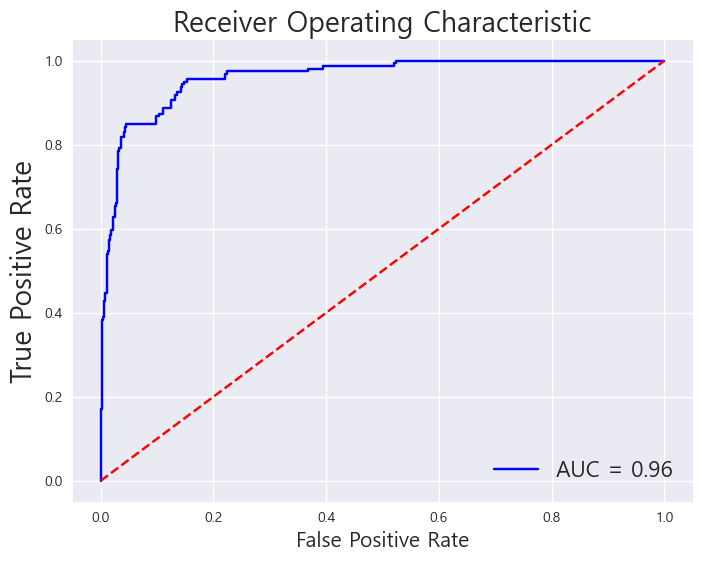

In [42]:
pred = logreg_cv.best_estimator_.predict(X_test)
results(X_test, y_test, pred, logreg_cv)

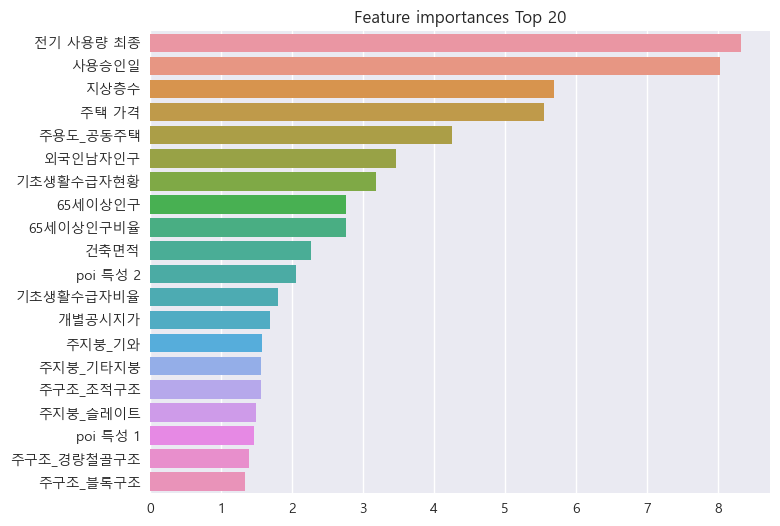

In [43]:
features_names = X_test.columns
f_importances(abs(logreg_cv.best_estimator_.coef_[0]), features_names)

In [44]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic.fit(X_train_all, y_train_all)
pred1 = Logistic.predict(X_test)

Confusion Matrix:
[[691  19]
 [ 39 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       710
           1       0.86      0.75      0.81       159

    accuracy                           0.93       869
   macro avg       0.90      0.86      0.88       869
weighted avg       0.93      0.93      0.93       869



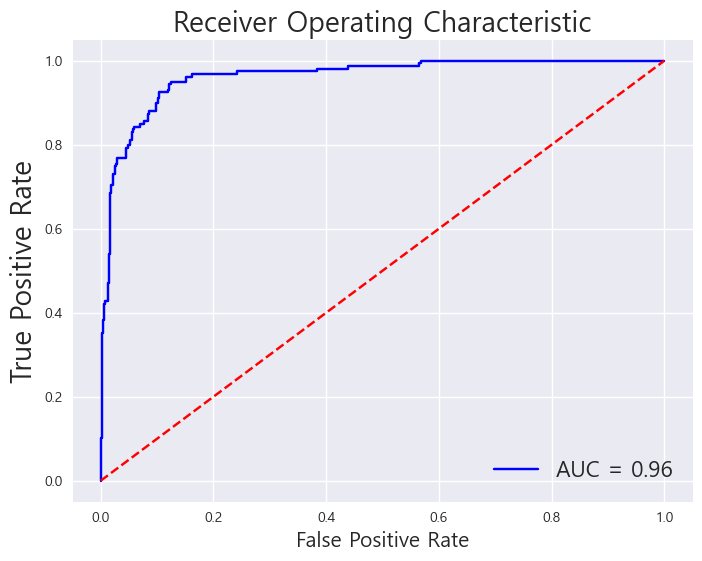

In [45]:
results(X_test, y_test, pred1, Logistic)

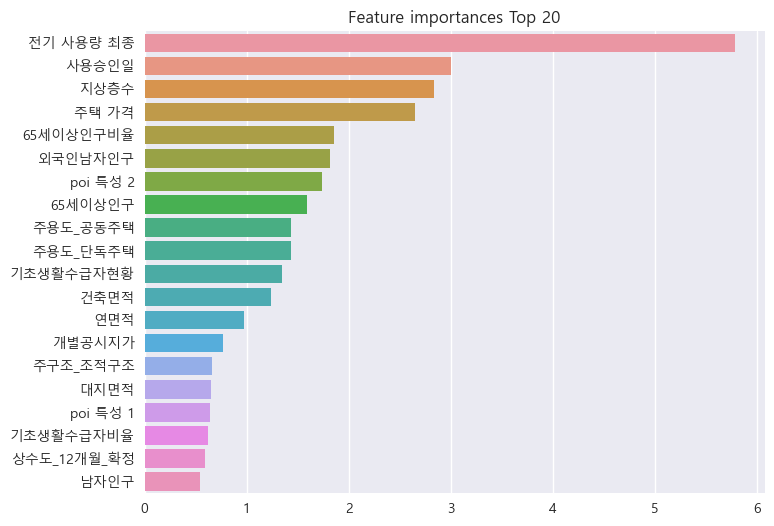

In [46]:
features_names = X_test.columns
f_importances(abs(Logistic.coef_[0]), features_names)


# Ridge Regression

In [44]:
def results_ridge(X_test, y_test, y_pred, model):    
    from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
    from sklearn import metrics
    from sklearn.metrics import classification_report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred)) 

    fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

    probs = model.decision_function(X_test)
    preds = probs.flatten()
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    ax_arr.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax_arr.plot([0, 1], [0, 1],'r--')
    ax_arr.set_title('Receiver Operating Characteristic',fontsize=20)
    ax_arr.set_ylabel('True Positive Rate',fontsize=20)
    ax_arr.set_xlabel('False Positive Rate',fontsize=15)
    ax_arr.legend(loc = 'lower right', prop={'size': 16})

In [45]:
# Ridge Regression Grid search
from sklearn.linear_model import RidgeClassifier
ridge_reg = RidgeClassifier()
params = {
    "alpha": np.logspace(-3,3,7), 
    "fit_intercept": [True, False],
     "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid = params, cv = 5, verbose=1)
Ridge_GS.fit(X_train_all,y_train_all)
print("tuned hpyerparameters :(best parameters) ",Ridge_GS.best_params_)
print("accuracy :",Ridge_GS.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
tuned hpyerparameters :(best parameters)  {'alpha': 0.001, 'fit_intercept': True, 'solver': 'lsqr'}
accuracy : 0.9141470534573983


Confusion Matrix:
[[673  37]
 [ 30 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       710
           1       0.78      0.81      0.79       159

    accuracy                           0.92       869
   macro avg       0.87      0.88      0.87       869
weighted avg       0.92      0.92      0.92       869



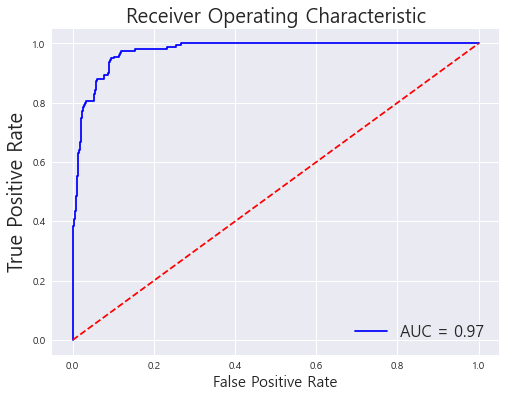

In [46]:
pred = Ridge_GS.best_estimator_.predict(X_test)
results_ridge(X_test, y_test, pred, Ridge_GS)

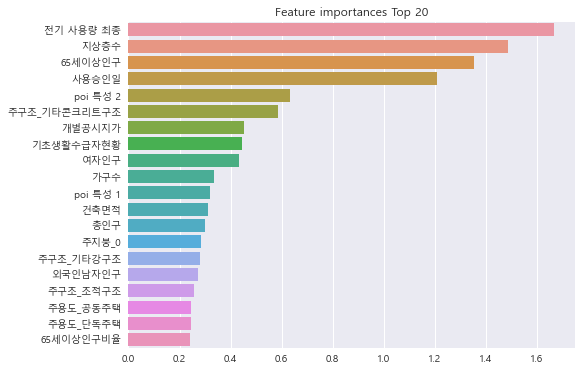

In [47]:
features_names = X_test.columns
f_importances(abs(Ridge_GS.best_estimator_.coef_[0]), features_names)

Confusion Matrix:
[[672  38]
 [ 31 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       710
           1       0.77      0.81      0.79       159

    accuracy                           0.92       869
   macro avg       0.86      0.88      0.87       869
weighted avg       0.92      0.92      0.92       869



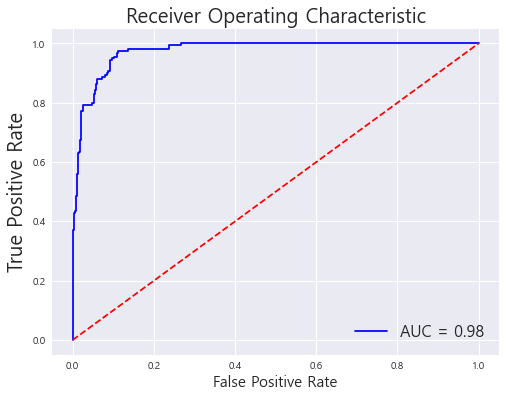

In [48]:
# Ridge Regression
Ridge = RidgeClassifier()
Ridge.fit(X_train_all,y_train_all)
pred1 = Ridge.predict(X_test)
results_ridge(X_test, y_test, pred1, Ridge)

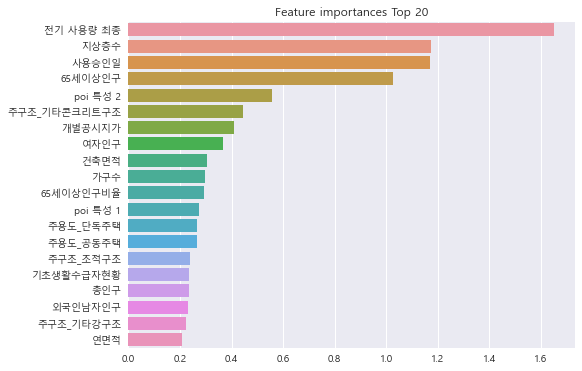

In [49]:
features_names = X_test.columns
f_importances(abs(Ridge.coef_[0]), features_names)

# Lasso Regression

In [50]:
# Lasso Regression Grid search
params={
    "C":np.logspace(-3,3,7), 
    "tol": np.logspace(-3,3,7), 
    "penalty" : ["l1"],
    "fit_intercept": [True, False], 
    "solver": ["liblinear", "saga"], 
    'max_iter' : [100,1000]}
lasso=LogisticRegression()
lasso_cv=GridSearchCV(lasso, param_grid = params, cv = 5, verbose=1)
lasso_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",lasso_cv.best_params_)
print("accuracy :",lasso_cv.best_score_)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
accuracy : 0.9353706744511342


Confusion Matrix:
[[692  18]
 [ 26 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       710
           1       0.88      0.84      0.86       159

    accuracy                           0.95       869
   macro avg       0.92      0.91      0.91       869
weighted avg       0.95      0.95      0.95       869



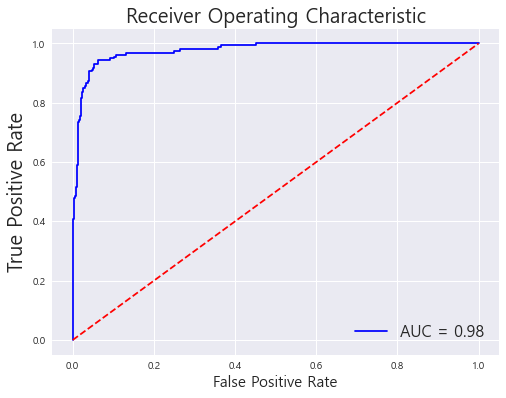

In [51]:
pred = lasso_cv.best_estimator_.predict(X_test)
results(X_test, y_test, pred, lasso_cv)

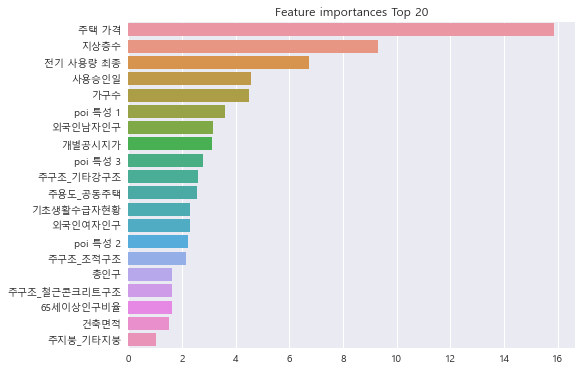

In [52]:
features_names = X_test.columns
f_importances(abs(lasso_cv.best_estimator_.coef_[0]), features_names)

Confusion Matrix:
[[694  16]
 [ 25 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       710
           1       0.89      0.84      0.87       159

    accuracy                           0.95       869
   macro avg       0.93      0.91      0.92       869
weighted avg       0.95      0.95      0.95       869



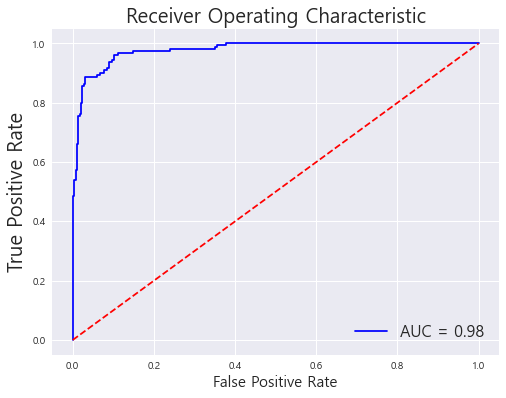

In [53]:
# Lasso Regression
Lasso = LogisticRegression(penalty='l1', solver='liblinear')
Lasso.fit(X_train_all,y_train_all)
pred1 = Lasso.predict(X_test)
results(X_test, y_test, pred1, Lasso)

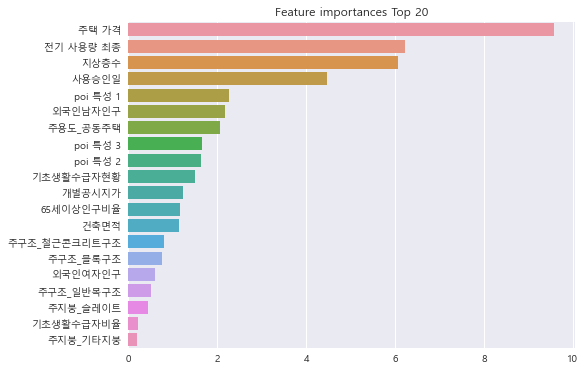

In [54]:
features_names = X_test.columns
f_importances(abs(Lasso.coef_[0]), features_names)

# SVM

In [55]:
from sklearn.svm import SVC
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['linear'],
    'probability' : [True],
    'shrinking' : [True, False]
}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid = params, scoring='accuracy',  cv=5, verbose=1)
svm_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 1, 'kernel': 'linear', 'probability': True, 'shrinking': True}
accuracy : 0.9329015386486651


Confusion Matrix:
[[689  21]
 [ 21 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       710
           1       0.87      0.87      0.87       159

    accuracy                           0.95       869
   macro avg       0.92      0.92      0.92       869
weighted avg       0.95      0.95      0.95       869



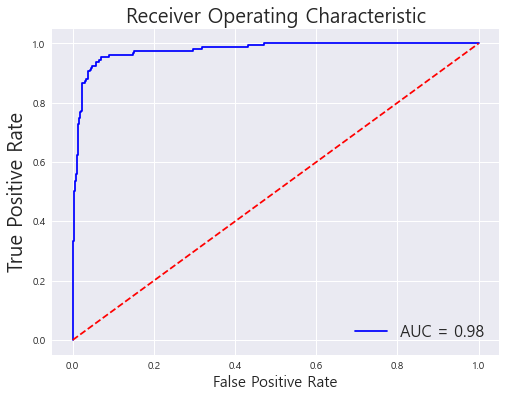

In [56]:
pred = svm_cv.best_estimator_.predict(X_test)
results(X_test, y_test, pred, svm_cv)

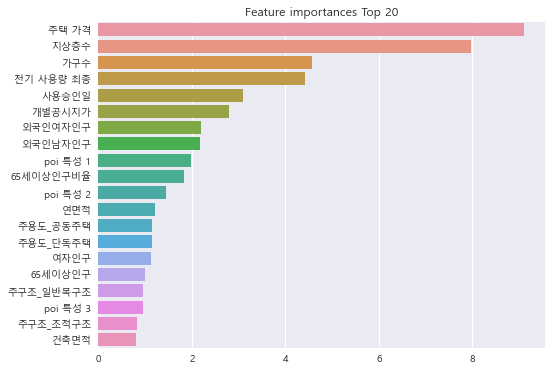

In [57]:
features_names = X_test.columns
f_importances(abs(svm_cv.best_estimator_.coef_[0]), features_names)

Confusion Matrix:
[[688  22]
 [ 26 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       710
           1       0.86      0.84      0.85       159

    accuracy                           0.94       869
   macro avg       0.91      0.90      0.91       869
weighted avg       0.94      0.94      0.94       869



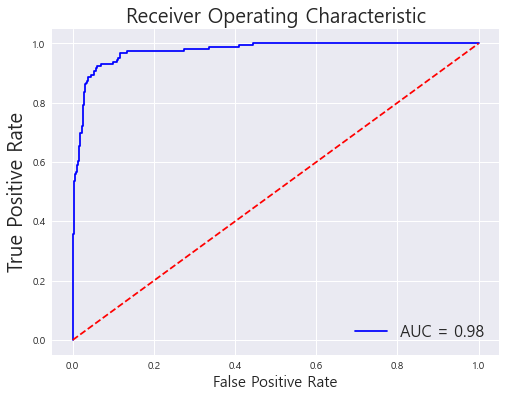

In [58]:
# support vector machine classifier
svm = SVC(kernel = 'linear', probability= True)
svm.fit(X_train_all, y_train_all)
pred1 = svm.predict(X_test)
results(X_test, y_test, pred1, svm)

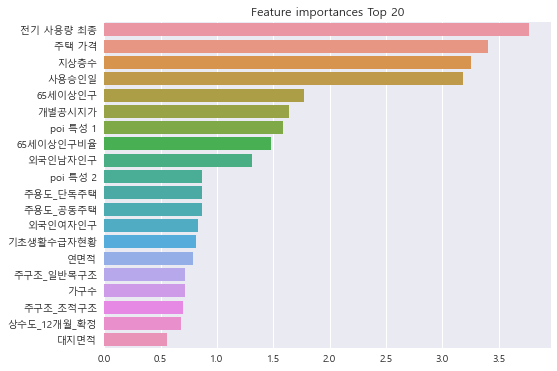

In [59]:
features_names = X_test.columns
f_importances(abs(svm.coef_[0]), features_names)

# DNN

In [38]:
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Adamax
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import backend as K

In [39]:
# dense_nparams : 초기 dense layer size
dense_nparams = [5, 10, 20]

# input_optimizer = optimizer
input_optimizer = [SGD, Adagrad, RMSprop, Adam, Adamax]

# input_lr : learning_rate
input_lr = [0.001, 0.01, 0.1, 0.2]

# hyperparameter 를 dictionary 화
param_grid = dict(dense_nparams = dense_nparams,
                input_optimizer = input_optimizer,
                input_lr = input_lr)

In [40]:
# hyperparameter tuning 대상 정의
def create_model(dense_nparams, input_optimizer, input_lr):

    model=Sequential()
    model.add(Dense(dense_nparams, activation="relu", input_shape=(X_train.shape[1],)))  
    model.add(Dense(dense_nparams, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    optimizer = input_optimizer(lr=input_lr)

    model.compile(optimizer = optimizer ,
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# hyperparameter tuning 대상 선언
# 파라미터 조합 당 epochs 는 30번, batch_size 는 32
classifier_model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32, verbose=0)

In [41]:
# cross_validation 정의
kf = KFold(n_splits=5, # Fold 는 5개로 지정
           shuffle=True
          )

# gridsearch 정의
# scoring : 검증셋의 성능을 무엇으로 측정할 것인지 
# verbose : 모든 log 출력하도록
grid = GridSearchCV(estimator=classifier_model, 
                    param_grid=param_grid, 
                    scoring = 'accuracy',
                    cv = kf,
                    verbose=3)

# gridsearch 시작
grid_result = grid.fit(X_train_all, y_train_all)

# gridesearch 결과
print("최고의 파라미터 :", grid_result.best_params_)
print("최고 평균 정확도 : {}".format(grid_result.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.833 total time=   5.3s
[CV 2/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.855 total time=   4.6s
[CV 3/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.780 total time=   4.4s
[CV 4/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.805 total time=   4.3s
[CV 5/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.805 total time=   4.2s
[CV 1/5] END dense_nparams=5, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'

[CV 3/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.921 total time=   4.5s
[CV 4/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.914 total time=   4.8s
[CV 5/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>;, score=0.943 total time=   4.8s
[CV 1/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.916 total time=   4.6s
[CV 2/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.946 total time=   4.7s
[CV 3/5] END dense_nparams=5, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.963 total time=   4.5s
[CV 4/5] END dense_nparams=5, input_lr=0.1, input

[CV 1/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.833 total time=   4.8s
[CV 2/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.862 total time=   4.6s
[CV 3/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.780 total time=   4.6s
[CV 4/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.815 total time=   4.6s
[CV 5/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.805 total time=   4.6s
[CV 1/5] END dense_nparams=10, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.948 total time=   7.6s
[CV 2/5] END dense_nparams=10, input_lr=0.001,

[CV 3/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.963 total time=   4.7s
[CV 4/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.928 total time=   4.6s
[CV 5/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>;, score=0.923 total time=   4.6s
[CV 1/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.911 total time=   7.7s
[CV 2/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.904 total time=   7.5s
[CV 3/5] END dense_nparams=10, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.921 total time=   7.3s
[CV 4/5] END dense_nparams=10, input_lr=0.1, input_optimiz

[CV 1/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.961 total time=   7.2s
[CV 2/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.956 total time=   7.4s
[CV 3/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.953 total time=   7.5s
[CV 4/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.933 total time=   7.2s
[CV 5/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.933 total time=   7.5s
[CV 1/5] END dense_nparams=20, input_lr=0.001, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>;, score=0.953 total time=   4.9s
[CV 2/5] END dense_nparams=20, input_lr=0.001, input

[CV 4/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.901 total time=   7.4s
[CV 5/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>;, score=0.919 total time=   7.4s
[CV 1/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>;, score=0.951 total time=   4.9s
[CV 2/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>;, score=0.931 total time=   4.9s
[CV 3/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>;, score=0.936 total time=   4.9s
[CV 4/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>;, score=0.914 total time=   4.8s
[CV 5/5] END dense_nparams=20, input_lr=0.1, input_optimizer=<class 'tensorflow.py

In [42]:
# 모델 정의
result_model = create_model(grid_result.best_params_['dense_nparams'],
                            grid_result.best_params_['input_optimizer'],
                            grid_result.best_params_['input_lr'])

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
history = result_model.fit(X_train, 
                y_train,
                epochs=300, 
                validation_data=(X_val, y_val), 
                callbacks=[early_stopping_cb], 
                class_weight={0:len(y_train[y_train==1])/len(y_train[y_train==0]),1:1})

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/300
45/45 [==============================] - 1s 12ms/step - loss: 0.2428 - accuracy: 0.6544 - val_loss: 0.5800 - val_accuracy: 0.7833
Epoch 2/300
45/45 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.8145 - val_loss: 0.5119 - val_accuracy: 0.7849
Epoch 3/300
45/45 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.8300 - val_loss: 0.4745 - val_accuracy: 0.7947
Epoch 4/300
45/45 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.8329 - val_loss: 0.4474 - val_accuracy: 0.8095
Epoch 5/300
45/45 [==============================] - 0s 5ms/step - loss: 0.1343 - accuracy: 0.8427 - val_loss: 0.4083 - val_accuracy: 0.8210
Epoch 6/300
45/45 [==============================] - 0s 5ms/step - loss: 0.1209 - accuracy: 0.8547 - val_loss: 0.3599 - val_accuracy: 0.8391
Epoch 7/300
45/

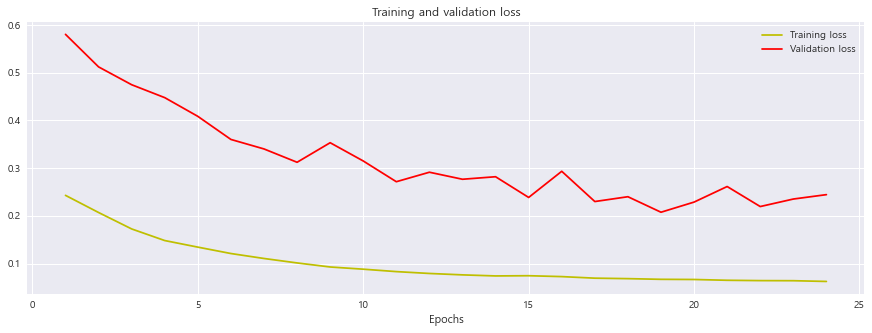

In [43]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

history_dict=history.history
history_dict.keys()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)


plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

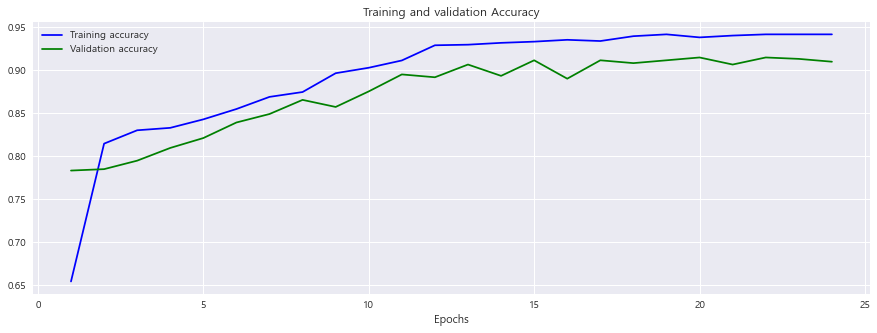

In [44]:
fig, loss_ax = plt.subplots(figsize=(15, 5))
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'g',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [45]:
predicted_result=result_model.predict(X_test)
predicted_result.shape
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 else 0 for i in range(0,predicted_result.shape[0])])

In [46]:
def dnn_results(X_test, y_test, y_pred, model):    
    from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
    from sklearn import metrics
    from sklearn.metrics import classification_report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred)) 

    fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

    preds = model.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    ax_arr.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax_arr.plot([0, 1], [0, 1],'r--')
    ax_arr.set_title('Receiver Operating Characteristic',fontsize=20)
    ax_arr.set_ylabel('True Positive Rate',fontsize=20)
    ax_arr.set_xlabel('False Positive Rate',fontsize=15)
    ax_arr.legend(loc = 'lower right', prop={'size': 16})

Confusion Matrix:
[[679  31]
 [ 16 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       710
           1       0.82      0.90      0.86       159

    accuracy                           0.95       869
   macro avg       0.90      0.93      0.91       869
weighted avg       0.95      0.95      0.95       869



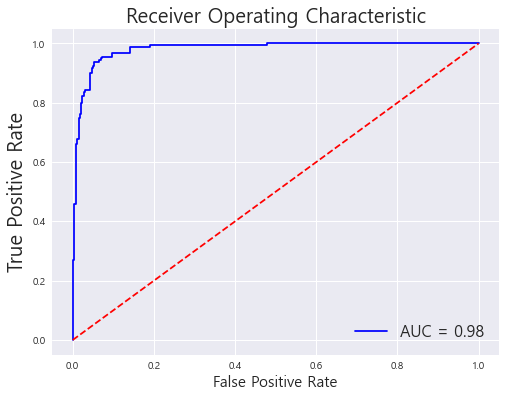

In [47]:
dnn_results(X_test, y_test, predicted_target, result_model)

In [48]:
model1 = Sequential()
model1.add(Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
print(model1.summary())

Model: "sequential_302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_906 (Dense)            (None, 10)                450       
_________________________________________________________________
dense_907 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_908 (Dense)            (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1=model1.fit(X_train_all,y_train_all,
                 epochs=200,batch_size=32,
                 validation_data=(X_val, y_val), 
                 callbacks=[early_stopping_cb], 
                 class_weight={0:len(y_train[y_train==1])/len(y_train[y_train==0]),1:1})

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.2413 - accuracy: 0.6127 - val_loss: 0.5493 - val_accuracy: 0.8194
Epoch 2/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.8382 - val_loss: 0.4578 - val_accuracy: 0.8506
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.1592 - accuracy: 0.8599 - val_loss: 0.3685 - val_accuracy: 0.8654
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.1318 - accuracy: 0.8569 - val_loss: 0.3287 - val_accuracy: 0.8588
Epoch 5/200
64/64 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.8658 - val_loss: 0.3430 - val_accuracy: 0.8604
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.1074 - accuracy: 0.8791 - val_loss: 0.2983 - val_accuracy: 0.8867
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 0.1013 - accuracy: 0.8934 - val_loss: 0.3088 - val_accuracy: 0.8883
Epoch 8/200
6

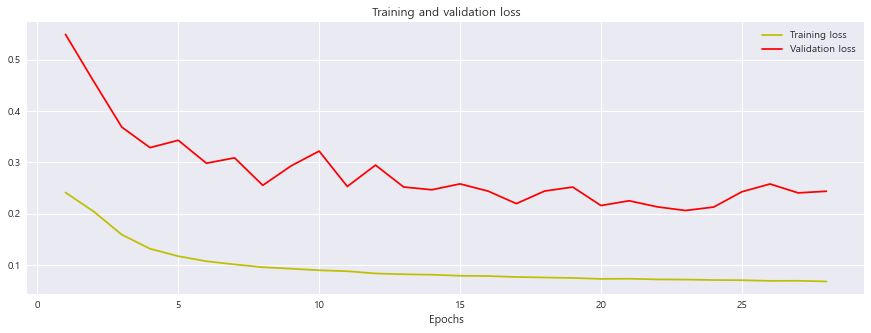

In [51]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']
epochs=range(1,len(acc)+1)


plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

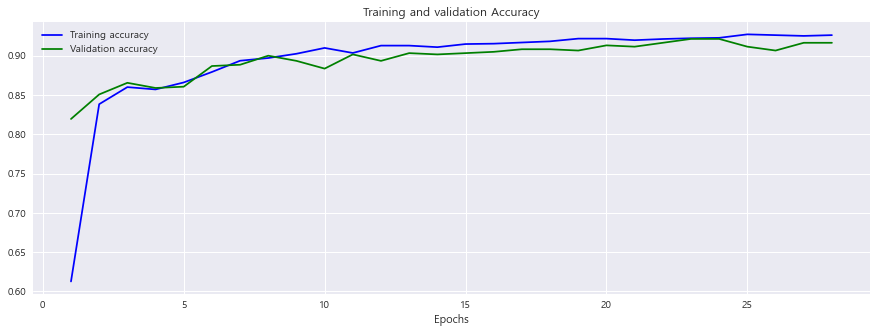

In [52]:
fig, loss_ax = plt.subplots(figsize=(15, 5))
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'g',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [53]:
predicted_result=model1.predict(X_test)
predicted_result.shape
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 else 0 for i in range(0,predicted_result.shape[0])])

Confusion Matrix:
[[662  48]
 [ 12 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       710
           1       0.75      0.92      0.83       159

    accuracy                           0.93       869
   macro avg       0.87      0.93      0.89       869
weighted avg       0.94      0.93      0.93       869



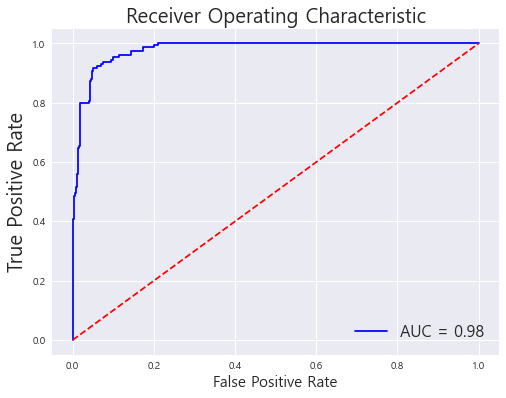

In [54]:
dnn_results(X_test, y_test, predicted_target, model1)